In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.model_selection import train_test_split

In [20]:
data = pd.read_csv('BigBasket Products.csv')
data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [22]:
data.describe().style.background_gradient(cmap= 'spring')

,index,sale_price,market_price,rating
count,27555.000000,27555.000000,27555.000000,18929.000000
mean,13778.000000,322.514808,382.056664,3.943410
std,7954.587670,486.263116,581.730717,0.739063
min,1.000000,2.450000,3.000000,1.000000
25%,6889.500000,95.000000,100.000000,3.700000
50%,13778.000000,190.000000,220.000000,4.100000
75%,20666.500000,359.000000,425.000000,4.300000
max,27555.000000,12500.000000,12500.000000,5.000000


In [23]:
data.drop(['index'], axis=1, inplace= True)

In [24]:
data.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [25]:
data.fillna(0, inplace=True)

In [26]:
data.isna().sum()

product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

Data Preprocessing

In [27]:
data['product'] = data['product'].str.replace('/@!#$%&*\|.','')

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_8424\3945966825.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['product'] = data['product'].str.replace('/@!#$%&*\|.','')


In [28]:
data['type'] = data['type'].str.replace('&','')
data.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [29]:
data['category'] = data['category'].str.replace('&','')

In [30]:
data.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden Pets",Storage & Accessories,Mastercook,180.0,180.0,Water Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning Household,Pooja Needs,Trm,119.0,250.0,Lamp Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


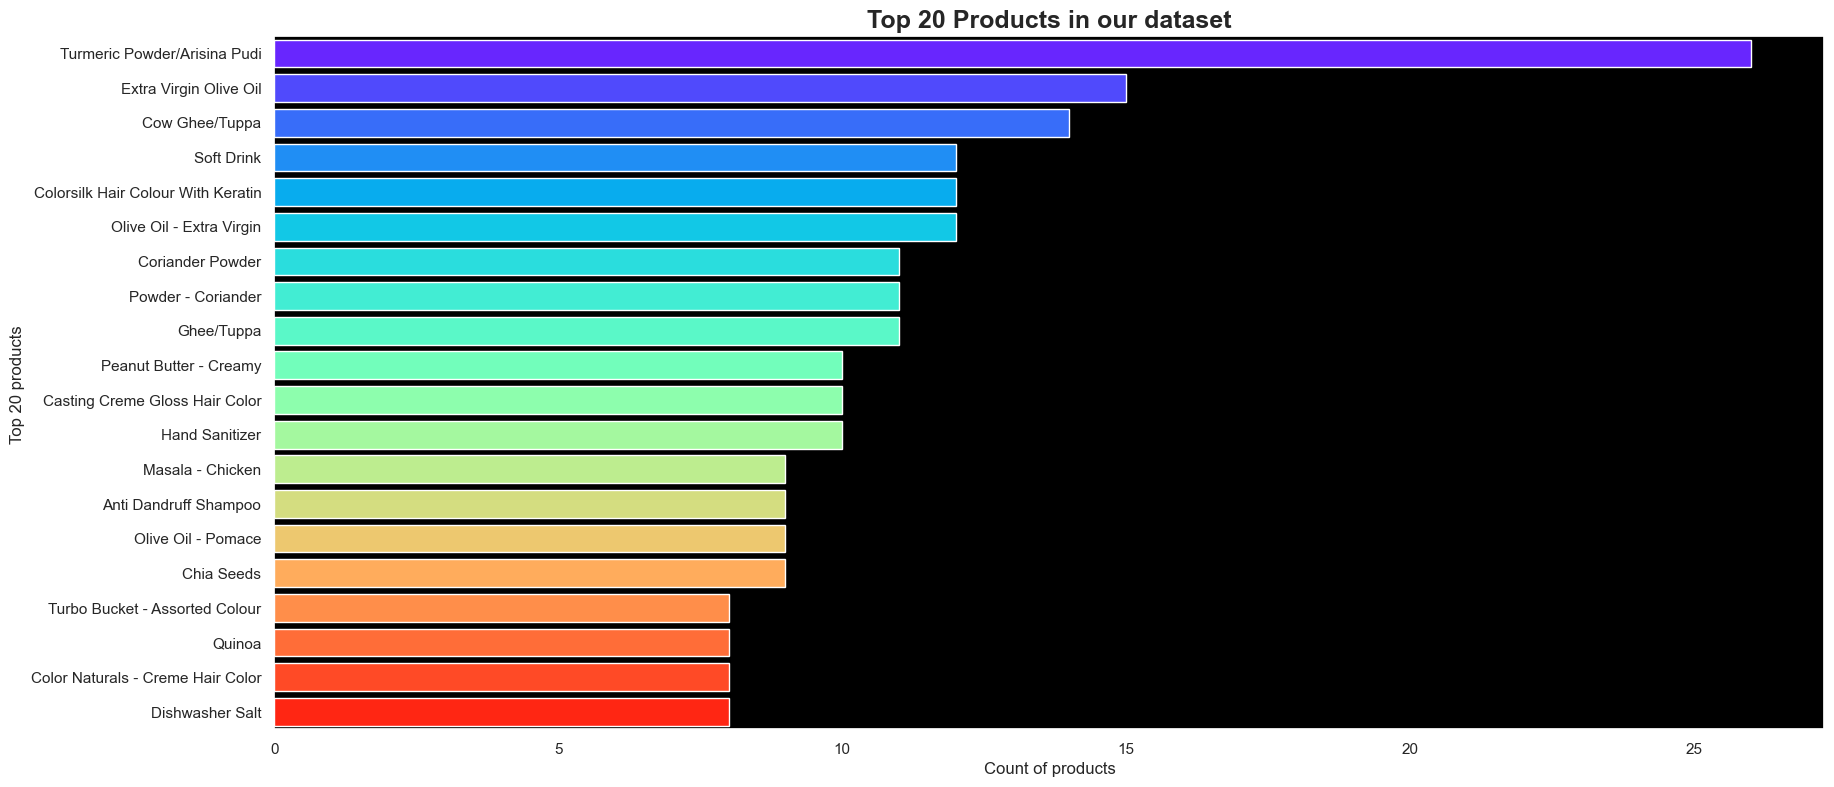

In [33]:
#count the top 20 values in product in dataset using value_counts
products = data['product'].value_counts()[:20]

ax = plt.axes()
#set the background color
ax.set(facecolor='black')
#set the figuresize and style 
sns.set(rc={'figure.figsize' : (19,8)} , style= 'dark')
#set the title with fontsize
ax.set_title("Top 20 Products in our dataset", fontsize=18, fontweight='bold')
#count the product using bar plot
sns.barplot(x=products,y=products.index,orient='h',palette='rainbow',saturation=1)
#set the y label
plt.ylabel("Top 20 products ")
#set the x label
plt.xlabel("Count of products")
plt.show()


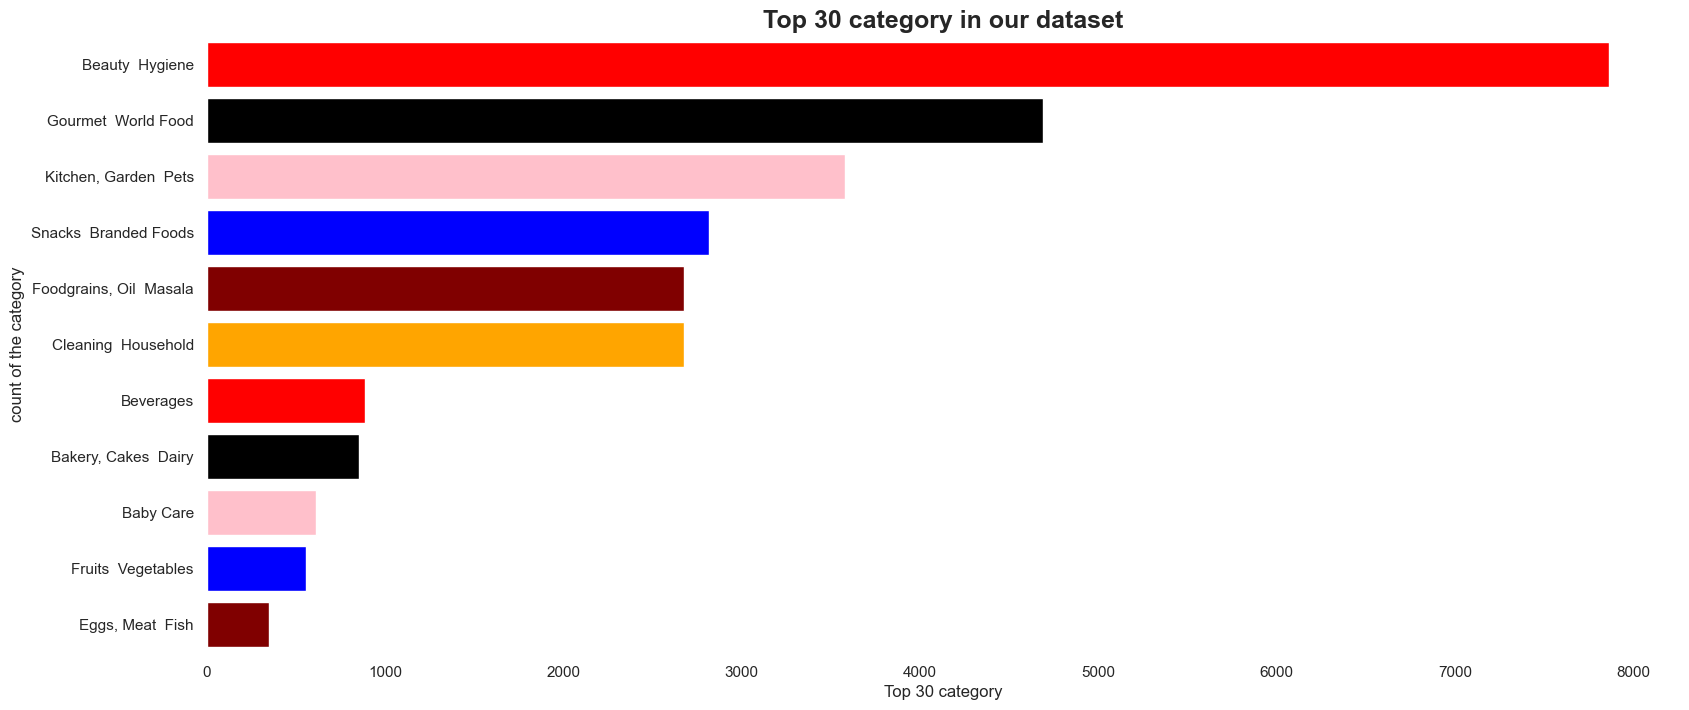

In [35]:
#Top 30 category in our dataset
category=data['category'].value_counts()[:30]
ax = plt.axes()
ax.set(facecolor='white')
sns.set(rc={'figure.figsize':(19,8)},style='dark')
ax.set_title("Top 30 category in our dataset",fontsize=18,fontweight='bold')
sns.barplot(x=category,y=category.index,orient='h',palette=['red','black','pink','blue','maroon','orange'],saturation=1)
plt.xlabel("Top 30 category")
plt.ylabel("count of the category")
plt.show()


In [36]:
print(category) 

Beauty  Hygiene            7867
Gourmet  World Food        4690
Kitchen, Garden  Pets      3580
Snacks  Branded Foods      2814
Foodgrains, Oil  Masala    2676
Cleaning  Household        2675
Beverages                   885
Bakery, Cakes  Dairy        851
Baby Care                   610
Fruits  Vegetables          557
Eggs, Meat  Fish            350
Name: category, dtype: int64


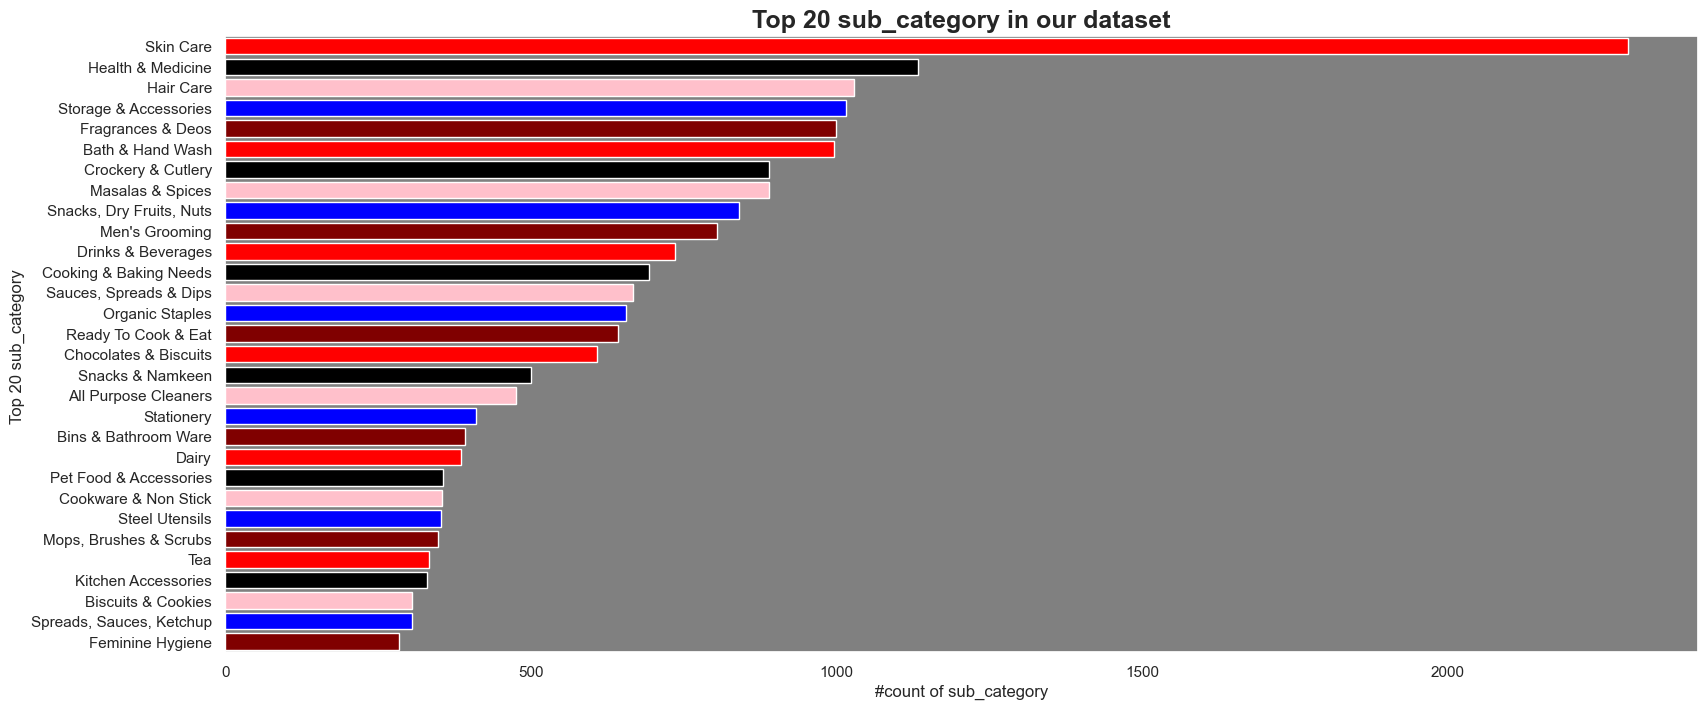

In [37]:
#to visualization top 20 sub_category in our dataset
sub_category=data['sub_category'].value_counts()[:30]
ax=plt.axes()
#set the background color
ax.set(facecolor='grey')
#set the figures size and style
sns.set(rc={'figure.figsize':(19,8)},style='dark')
#set the title with fonsize and fontweight
ax.set_title("Top 20 sub_category in our dataset",fontsize=18,fontweight='bold')
#count the sub_category count using the barplot
sns.barplot(x=sub_category,y=sub_category.index,orient='h',palette=['red','black','pink','blue','maroon'],saturation=1)
#set the x label
plt.ylabel("Top 20 sub_category ")
#set the y label
plt.xlabel("#count of sub_category")
plt.show()

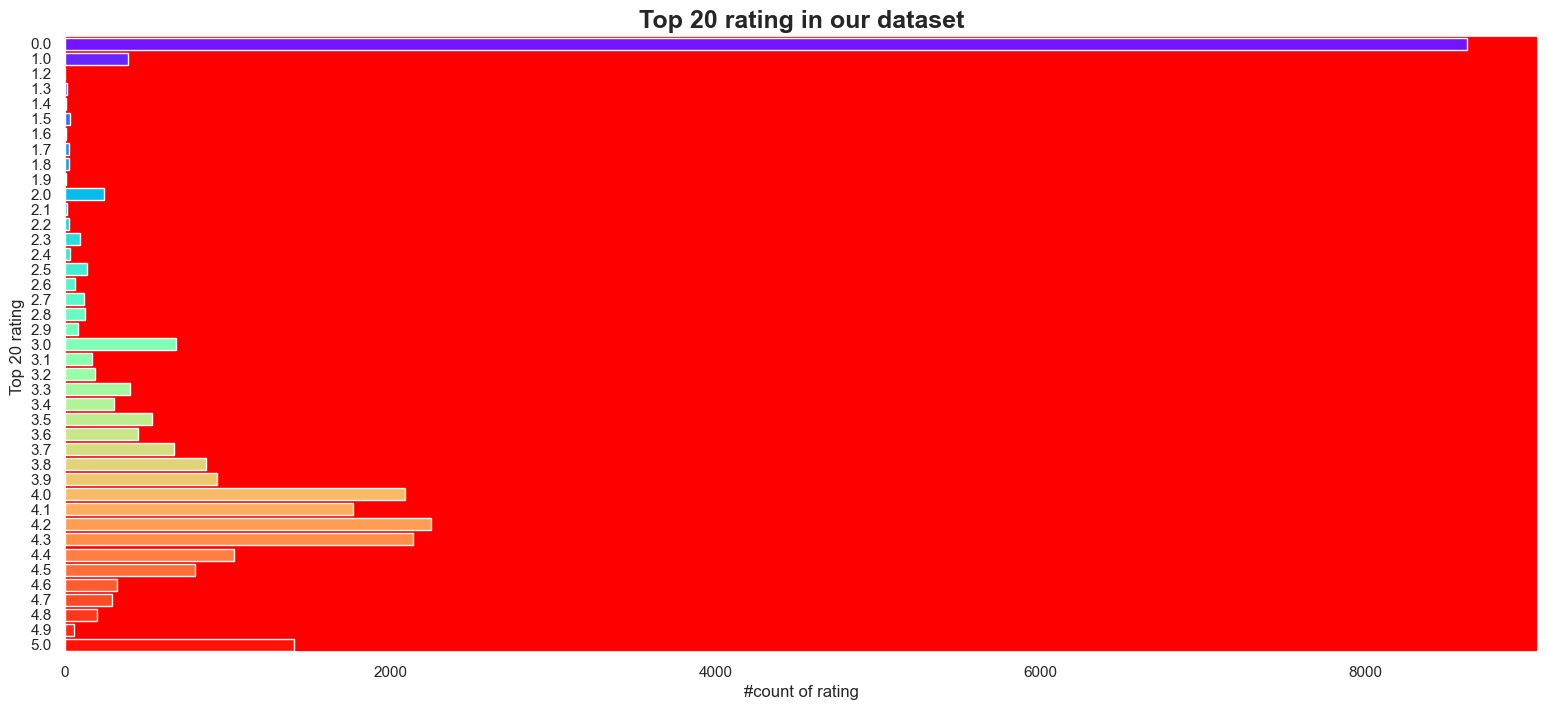

In [40]:
#to visualization top 20 rating in our dataset
rating=data['rating'].value_counts()
ax=plt.axes()
#set the background color
ax.set(facecolor='red')
#set the figures size and style
sns.set(rc={'figure.figsize':(19,8)},style='dark')
#set the title with fonsize and fontweight
ax.set_title("Top 20 rating in our dataset",fontsize=18,fontweight='bold')
#count the rating count using the barplot
sns.barplot(x=rating,y=rating.index,orient='h',palette='rainbow',saturation=1)
#set the x label
plt.ylabel("Top 20 rating ")
#set the y label
plt.xlabel("#count of rating")
plt.show()

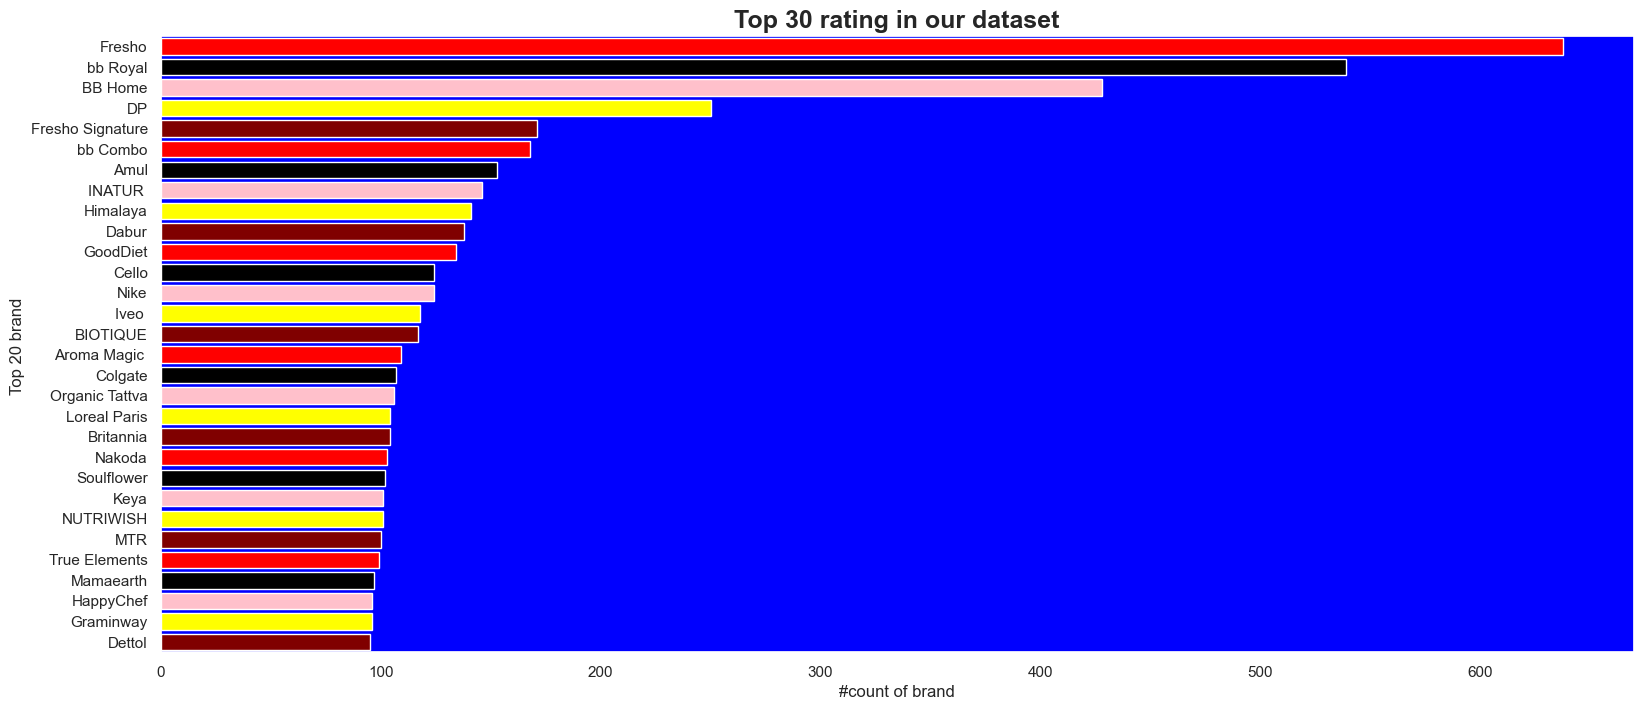

In [41]:
#to visualization top 30 brand in our dataset
brand=data['brand'].value_counts()[:30]
ax=plt.axes()
#set the background color
ax.set(facecolor='blue')
#set the figures size and style
sns.set(rc={'figure.figsize':(19,8)},style='dark')
#set the title with fonsize and fontweight
ax.set_title("Top 30 rating in our dataset",fontsize=18,fontweight='bold')
#count the brand count using the barplot
sns.barplot(x=brand,y=brand.index,orient='h',palette=['red','black','pink','yellow','maroon'],saturation=1)
#set the x label
plt.ylabel("Top 20 brand ")
#set the y label
plt.xlabel("#count of brand")
plt.show()

In [42]:
import plotly.express as px

In [43]:
#visualization with scatter plot with plotly with market_price and sales_price along with brand
fig=px.line(data[:500],x='sale_price',y='market_price',color='brand',title='Difference between sales price & and market price with brand names')
fig.show()

In [44]:
data.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [45]:
#to find the brand's sale_price is repeat using groupby function
brand_sale=data.groupby(['brand','sale_price']).size().reset_index().rename(columns={0:'brand_sale_price'}).sort_values(by=['brand_sale_price','sale_price'], ascending =False)
brand_sale.head()

,brand,sale_price,brand_sale_price
3712,Dorall Collection,419.3,37
13078,Schwarzkopf,425.0,34
1182,BB Home,229.0,27
10070,Nike,223.2,26
1180,BB Home,209.0,24


In [47]:
#to visualize the above data using plotly with bar plot.And take the brand on x_axis and sales_price on y_axis 
fig=px.histogram(brand_sale[:200],y='sale_price',x='brand',color='brand_sale_price',title='The differnce between sales price with brand')
fig.show()

In [56]:
dataframe= pd.pivot_table(data, index=['type'],values=['sale_price','market_price','brand'],aggfunc='sum').sort_values(by='market_price',ascending=False)
dataframe.head().style.background_gradient(cmap='PuRd')

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_8424\2865668362.py:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



,market_price,sale_price
type,,
Face Care,749705.000000,633484.730000
Eau De Toilette,409083.000000,297717.400000
Eau De Parfum,319429.000000,262168.800000
Glassware,249276.000000,199250.000000
Pressure Cookers,239749.000000,210367.500000


In [54]:
data.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden Pets",Storage & Accessories,Mastercook,180.0,180.0,Water Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning Household,Pooja Needs,Trm,119.0,250.0,Lamp Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [57]:
fig=px.scatter(dataframe,x='market_price', y='sale_price',title='The relationship between market price and sale price')
fig.show()

In [58]:
brand_rating=data.groupby(['brand','rating']).size().reset_index().rename(columns={0:'brand_with_rating'}).sort_values(by=['brand_with_rating'],ascending=False)
brand_rating.head()

,brand,rating,brand_with_rating
3073,Fresho,0.0,635
10164,bb Royal,0.0,261
760,BB Home,0.0,255
10152,bb Combo,0.0,164
3079,Fresho Signature,0.0,162


In [59]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [60]:
fig=ff.create_table(brand_rating[:200])
fig

In [61]:
fig=px.histogram(brand_rating[:200],x='brand',y='brand_with_rating',color='rating',title='Brand with Rating')
fig.update_layout(bargap=0.1)
fig.show()

In [62]:
market_type=data.groupby(['market_price','type']).size().reset_index().rename(columns={0:'market_price_with_type'}).sort_values(by='market_price',ascending=False)
market_type.head()

,market_price,type,market_price_with_type
12761,12500.0,Pet Cleaning Grooming,1
12760,12245.0,Gas Stove,1
12759,10769.0,Hair Removal,1
12758,10695.0,Gas Stove,1
12757,10090.0,Pet Meals Treats,1


In [65]:
fig=px.histogram(market_type[:200],x='type',y='market_price',color='market_price_with_type',title="Market Price with Items")
fig.update_layout(bargap=0.5)
fig.show()

In [66]:
#Using groupby function to visualise brand value with market price
market_brand=data.groupby(['market_price','brand']).size().reset_index().rename(columns={0:'market_price_with_brand'}).sort_values(by='market_price',ascending=False)
market_brand.head().style.background_gradient(cmap='spring')

,market_price,brand,market_price_with_brand
15048,12500.000000,Wahl,1
15047,12245.000000,Prestige,1
15046,10769.000000,Braun,1
15045,10695.000000,Prestige,1
15044,10090.000000,Farmina,1


In [69]:
#Visualising the above data using bargraph on which brand wiil be on x-axis and market price on y-axis
fig=px.histogram(market_brand[:200],x='brand',y='market_price',color='market_price_with_brand',title="Brand with Market Price")
fig.update_layout(bargap=0.5)
fig.show()

In [76]:
import matplotlib.cm as cm

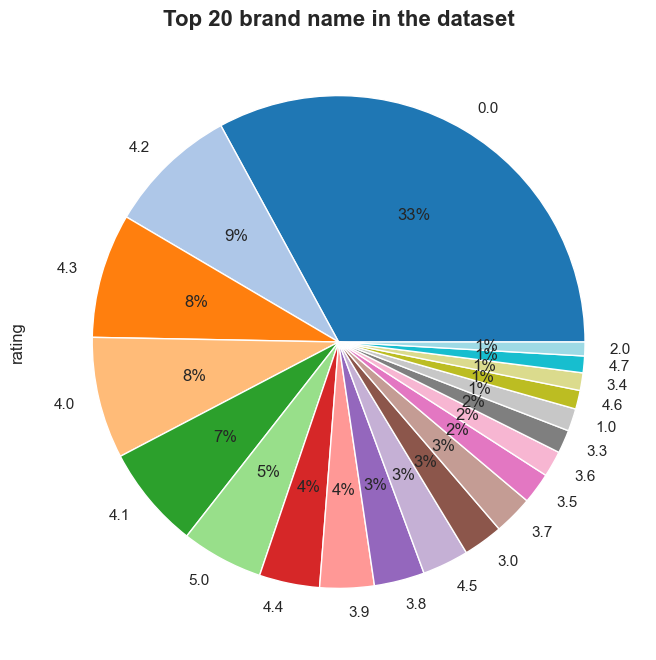

In [77]:
data['rating'].value_counts().sort_values(ascending=False).head(20).plot(kind='pie',autopct='%1.0f%%',colors=cm.tab20(np.linspace(0, 1, 20)),figsize=(25,8))
plt.title("Top 20 brand name in the dataset",fontsize=16,fontweight='bold')
plt.xticks(rotation=45)
plt.show()

In [78]:
data['description']=data['description'].str.lower()

In [79]:
data['description']

0        this product contains garlic oil that is known...
1        each product is microwave safe (without lid), ...
2        a perfect gift for all occasions, be it your m...
3        multipurpose container with an attractive desi...
4        nivea creme soft soap gives your skin the best...
                               ...                        
27550    layerr brings you wottagirl classic fragrant b...
27551    puramate rosemary is enough to transform a dis...
27552    we have taken the richness of sweet potatoes (...
27553    tetley green tea with its refreshing pure, ori...
27554    the new mens fragrance from the united dreams ...
Name: description, Length: 27555, dtype: object

In [80]:
#converting description into array using nltk library
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
#cleaning the data
port_set=PorterStemmer()
